### TPC7: Construir uma aplicação para manipular polinómios

Depois da aula da semana passada, já tens algumas funções desenvolvidas que te irão ajudar a construir a aplicação que se descreve a seguir.

* Aquecimento: Instancia os seguintes exemplos num ficheiro de texto com o formato definido na última aula
    - `x^7 - 3.7x^4 + 5x^3 - 88`
    - `2x^2 + 17`
    - `7x^4 + 6x^3 - x^2 + 43`
    - `x^4`
    - `x^2`
    - `x^3`

* Desenvolve as seguintes funcionalidades que não foram trabalhadas na aula:
    1. Define uma função que dado um polinómio calcula a sua derivada;
    2. Define uma função que recebe dois polinómios `p1` e `p2` e calcula um novo polinómio correspondente à soma de `p1` e `p2`;
    3. Define uma função que recebe um polinómio e o desenha num gráfico.

* Num ficheiro Python, cria uma aplicação para manipular polinómios com as seguintes operações:
    1. Criar um polinómio interativamente;
    2. Ler uma lista de polinómios de um ficheiro;
    3. Listar polinómios: mostra numa tabela os polinómios carregados em memória, adicionando um número de ordem a cada um;
    4. Calcular o valor de um polinómio num ponto (usa o número de ordem para referenciar o polinómio);
    5. Listar polinómios com grau: à listagem anterior, acrescenta mais uma coluna com o grau;
    6. Maior grau: mostra o polinómio de maior grau e indica o seu número de ordem;
    7. Derivada: mostra uma tabela com os polinómios e as respetivas derivadas;
    8. Somar dois polinómios: indicando os seus números de ordem;
    9. Gerar um gráfico para o polinómio;
    10. Gravar num ficheiro os polinómios em memória;
    0. Sair da aplicação


In [1]:
p1=[(1,7),(3.7,4),(5,3),(-88,0)]
p2=[(2,2),(17,1)]
p3=[(7,4),(6,3),(-1,2),(43,0)]
p4=[(1,4)]
p5=[(1,2)]
p6=[(1,3)]
listap = [p1,p2,p3,p4,p5,p6]
print (listap)

[[(1, 7), (3.7, 4), (5, 3), (-88, 0)], [(2, 2), (17, 1)], [(7, 4), (6, 3), (-1, 2), (43, 0)], [(1, 4)], [(1, 2)], [(1, 3)]]


In [2]:
def Guardar_POL(listap, fnome):
    file = open("ptpc7.txt","w") 
    for p in listap:
        for termo in p:
            coeficiente = termo[0]
            grau = termo[1]
            file.write(str(coeficiente) + "," + str(grau) + ";")
        file.write("\n")
    file.close()
            
Guardar_POL(listap,"ptpc7.txt")

In [3]:

def criaPolIn():
    polinomio = []
    i = 1
    grau = int(input ("Insira o grau do polinomio"))
    while grau >= 0:
        coeficiente = int(input ("Insira o coeficiente do polinómio " + str(i)))
        if coeficiente != 0:
            termo = (coeficiente, grau)
            polinomio.append(termo)
            grau = grau - 1
            i = i + 1
    return polinomio
p4 = criaPolIn()
print(p4)
    

[(3, 2), (4, 1), (3, 0)]


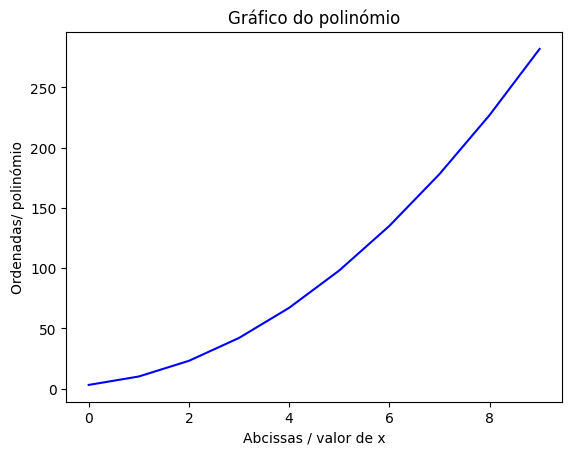

None


In [4]:

def derivarPolinomio(p):
    derivada = [] 
    for coeficiente,grau in p:
        if grau !=0:
            grau2 = grau - 1    
            derivada.append((coeficiente*grau, grau2))
    return derivada

def somarPolinomios(p1,p2):
    somaPOL = []
    i = 0
    w = 0
    while i < len(p1) and w < len(p2):
        coeficiente1, grau1 = p1[i]
        coeficiente2, grau2 = p2[w]

        if grau1 == grau2:
            somaPOL.append((coeficiente1 + coeficiente2, grau2))
            i = i + 1
            j = j + 1
        elif grau1 > grau2:
            somaPOL.append((coeficiente1, grau1))
            i = i + 1
        else:
            somaPOL.append((coeficiente2, grau2))
            w = w + 1
    return somaPOL

import matplotlib.pyplot as plt

def pot(a,b):
    res = 1
    while b > 0:
        res = res * a
        b = b - 1 
    return res 
    
def calcPolinomio(p, x):
    res = 0
    for termo in p:
        coeficiente = termo[0]
        grau = termo[1]
        res = res + coeficiente * pot(x, grau)
    return res

def graficoPolinomio(p):

    valoresx = []
    valoresy = []

    for x in range (0,10):
        valoresx.append(x)
        y = calcPolinomio(p,x)
        valoresy.append(y)

    plt.plot(valoresx, valoresy, color = "blue")
    

    plt.xlabel("Abcissas / valor de x")
    plt.ylabel("Ordenadas/ polinómio")

    plt.title("Gráfico do polinómio")

    plt.show()

print(graficoPolinomio(p4))


In [11]:
import matplotlib.pyplot as plt
#opção1
p1=[(1,7),(3.7,4),(5,3),(-88,0)]
p2=[(2,2),(17,1)]
p3=[(7,4),(6,3),(-1,2),(43,0)]
p4=[(1,4)]
p5=[(1,2)]
p6=[(1,3)]
listap = [p1,p2,p3,p4,p5,p6]


def CriarPolinomio():
    polinomio=[]
    grau= int (input("Introduza o grau do polinómio"))
    i=1
    while grau >= 0:
        coeficiente = int(input ("Insira o coeficiente do polinómio " + str(i)))
        if coeficiente != 0:
            termo = (coeficiente, grau)
            polinomio.append(termo)
            grau = grau - 1
            i = i + 1
    listap.append(polinomio)
    return listap
Guardar_POL(listap,"polinomiostpc7.txt")    
    
    
            
#opção2    
def Ler_Ficheiro(fnome):
    file = open (fnome, "r")
    lines = file.readlines()
    lista = []
    for line in lines:
        polinomio = []
        termo = line.split(";")
        termo.remove("\n")
        for t in termo:
            monomio= t.split(",")
            monomio = (float(monomio[0]),int(monomio[1]))
            polinomio.append(monomio)
        lista.append(polinomio)
    file.close()
    return lista


#opção3 
def listarPolinomios(fnome):
    ordem = 1
    file = open(fnome)
    print ("ordem || Polinómio")
    ordem=1
    lines=file.readlines()
    for line in lines:
        polinomio=[]
        termos = line.split(";") 
        termos.remove ("\n") 
        for t in termos:
            monomio = t.split(",")
            monomio = (float(monomio[0]),int(monomio[1]))
            polinomio.append(monomio)
        ordem = ordem + 1
        print ("----------------------")
        print(str (ordem), "    ||  "  , str(polinomio ))
    file.close()
#opção4
def pot (a,b):
    res = 1
    while b > 0:
        res = res * a
        b = b - 1
    return res 
def calcPolinomio(polinomio, x):
    res = 0
    for termo in polinomio:
        coeficiente = termo[0]
        grau = termo[1]
        #coeficiente, grau = termo
        res = res + coeficiente * pot(x,grau)
    return res

#opção5
def listaPoliGrau(fnome):
    ordem = 1
    file = open(fnome)
    lines= file.readlines()
    print ("ordem || grau || polinómio")
    print ("------------------------")
    for line in lines:
        polinomio=[]
        termos = line.split(";") 
        termos.remove ("\n") 
        maior = 0
        for t in termos:
            monomio = t.split(",")
            coeficiente, grau = monomio
            monomio = (float(monomio[0]),int(monomio[1]))
            polinomio.append(monomio)
            if int (grau) > int (maior):
                maior= grau
        print (str(ordem), "    || " ,str(maior),  "  ||  " ,polinomio)
        ordem = ordem + 1
        print ("----------------------")
    file.close()

#opção6
def PolMaiorGrau(fnome):
    print ("Polinomio maior grau                        ||    Ordem")
    file = open (fnome, "r")
    lines = file.readlines()
    ordem = 0
    maior = 0
    x = 0
    for line in lines:
        termos = line.split(";")
        termos.remove ("\n") 
        ordem = ordem + 1
        for t in termos:
            monomio = t.split(",")  
            coeficiente, grau = monomio 
            monomio = (float(monomio[0]),int(monomio[1]))
            if int(grau) > int(maior):
                maior = grau
                n = x
        x = x + 1
    print (Ler_Ficheiro("polinomiostpc7.txt")[n],  " || ", ordem )
    file.close()
           

#opção7
def derivarPolinomio(fnome):
    print ("Polinomio                         ||    Derivada")
    file=open(fnome,"r")
    lines=file.readlines()
    derivada=[] 
    for line in lines:
        polinomio=[]
        termos =line.split(";")
        termos.remove ("\n")
        for t in termos:
            monomio = t.split(",")
            monomio = (float(monomio[0]),int(monomio[1]))
            polinomio.append(monomio)
            for coeficiente,grau in polinomio:
                if grau !=0:
                    grau2 = grau - 1    
                    derivada.append((coeficiente*grau, grau2))
                else:
                    derivada.append((coeficiente,0))
                
        
    print (str(derivada), "    || " ,polinomio)
    file.close()

#opção8
def somarPolinomios(p1,p2):
    somaPOL = []
    i = 0
    w = 0
    while i < len(p1) and w < len(p2):
        coeficiente1, grau1 = p1[i]
        coeficiente2, grau2 = p2[w]

        if grau1 == grau2:
            somaPOL.append((coeficiente1 + coeficiente2, grau2))
            i = i + 1
            j = j + 1
        elif grau1 > grau2:
            somaPOL.append((coeficiente1, grau1))
            i = i + 1
        else:
            somaPOL.append((coeficiente2, grau2))
            w = w + 1
    return somaPOL


#opção9
def graficoPolinomio(polinomio):

    valoresx = []
    valoresy = []

    for x in range (0,10):
        valoresx.append(x)
        y = calcPolinomio(polinomio,x)
        valoresy.append(y)

    plt.plot(valoresx, valoresy, color = "pink")
    

    plt.xlabel("Abcissas / valor de x")
    plt.ylabel("Ordenadas/ polinómio")

    plt.title("Gráfico do polinómio")

    plt.show()







menu = ("1-Cria o teu polinómio \n 2-Ler Lista de polinómios \n 3-Lista de polinómios \n 4-Calcula o valor do polinómio num ponto \n 5-Listar polinómios com grau \n 6-Polinómio com maior grau \n 7-Derivada polinómios \n 8-Somar dois polinómios \n 9-Gerar um gráfico para o polinómio \n 10- Gravar num ficheiro os polinómios \n 11-Fechar")
print(menu)
opc=int(input("Escolha a sua opção"))
while opc != 0:
    if opc==1:
        print (CriarPolinomio())
    if opc==2:
        (Ler_Ficheiro("polinomiostpc7.txt"))
    if opc==3:
        listarPolinomios("polinomiostpc7.txt")
    if opc==4:
        escolherpol=input("Qual é a ordem do polinómio que pretende?")
        x=int(input("Qual é o valor de x?"))
        #calcPolinomio(polinomio, x)
    if opc==5:
        listaPoliGrau("polinomiostpc7.txt")
    if opc==6:
       PolMaiorGrau("polinomiostpc7.txt")
    if opc==7:
        derivarPolinomio("polinomiostpc7.txt")
    if opc==8:
        p1=int(input("Qual é a ordem do primeiro polinómio que quer somar?"))
        p2=int(input("Qual é a ordem do segundo polinómio que quer somar?"))
        somarPolinomios(p1,p2)
    if opc==9:
        ordem = int(input("Qual a ordem do seu polinómio?"))
        graficoPolinomio(Ler_Ficheiro("polinomiostpc7.txt")[(ordem-1)]) 


    print(menu)
    opc=int(input("Qual é a próxima opção?"))
print("Fechar")





    


1-Cria o teu polinómio 
 2-Ler Lista de polinómios 
 3-Lista de polinómios 
 4-Calcula o valor do polinómio num ponto 
 5-Listar polinómios com grau 
 6-Polinómio com maior grau 
 7-Derivada polinómios 
 8-Somar dois polinómios 
 9-Gerar um gráfico para o polinómio 
 10- Gravar num ficheiro os polinómios 
 11-Fechar
